In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
confirmed_data = pd.read_csv("C:/Users/jmarshall/downloads/datasets_494724_1196190_time_series_covid_19_confirmed.csv")
death_data = pd.read_csv("C:/Users/jmarshall/downloads/datasets_494724_1196190_time_series_covid_19_deaths.csv")

In [3]:
confirmed_data.tail(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,251,251,251,251,251,251,299,441,443,458
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,167,184,197,209,212,222,233,249,256,278
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,11,34,34,78,78,87,87,87,87,87
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,1936,2140,2350,2551,2738,2929,3100,3266,3424,3563
265,NaN,Lesotho,-29.609988,28.233608,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,2


In [4]:
death_data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,178,187,193,205,216,218,219,220,227,235
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,32,32,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,561,568,575,582,592,600,609,617,623,630
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,3,3,4,4,4,4,4,4


In [5]:
confirmed_data["Province/State"].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Anhui',
       'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Martinique', 'Aruba', 'Curacao', 'Sint

In [6]:
confirmed_data["Province/State"].fillna("", inplace=True)
death_data["Province/State"].fillna("", inplace=True)

In [7]:
confirmed_data["Country - State"] = confirmed_data[["Country/Region", "Province/State"]].apply(lambda x: ' - '.join(x), axis=1)
death_data["Country - State"] = death_data[["Country/Region", "Province/State"]].apply(lambda x: ' - '.join(x), axis=1)

In [8]:
death_data.drop(["Province/State", "Country/Region"], axis=1, inplace=True)

In [9]:
confirmed_data.drop(["Province/State", "Country/Region"], axis=1, inplace=True)

In [10]:
WuhanLat = 30.5928/(180/math.pi)
WuhanLong = 114.3055/(180/math.pi)
countriesLat = confirmed_data["Lat"]
countriesLong = confirmed_data["Long"]

In [11]:
def dist_from_Wuhan(long, lat):
    3963.0*np.arccos((np.sin(WuhanLat)*np.sin(lat)) + np.cos(WuhanLat)*np.cos(lat)*np.cos(long - WuhanLong))

confirmed_data["Distance"] = dist_from_Wuhan(countriesLat, countriesLong)    
death_data["Distance"] = dist_from_Wuhan(countriesLat, countriesLong)

In [12]:
test_series = death_data["Country - State"].astype('category')

In [13]:
death_data["Country - State"] = death_data["Country - State"].astype('category')

In [14]:
confirmed_data["Country - State"] = confirmed_data["Country - State"].astype('category')

In [15]:
death_data.index

RangeIndex(start=0, stop=266, step=1)

In [16]:
confirmed_data.iloc[0:5,0:5]

,Lat,Long,1/22/20,1/23/20,1/24/20
0,33.0000,65.0000,0,0,0
1,41.1533,20.1683,0,0,0
2,28.0339,1.6596,0,0,0
3,42.5063,1.5218,0,0,0
4,-11.2027,17.8739,0,0,0


In [17]:
test_df = confirmed_data
test_df.set_index("Country - State", inplace=True)
test_df.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,Distance
Country - State,,,,,,,,,,,,,,,,,,,,,
Afghanistan -,33.0000,65.0000,0,0,0,0,0,0,0,0,...,8145,8676,9216,9998,10582,11173,11831,12456,13036,None
Albania -,41.1533,20.1683,0,0,0,0,0,0,0,0,...,964,969,981,989,998,1004,1029,1050,1076,None
Algeria -,28.0339,1.6596,0,0,0,0,0,0,0,0,...,7542,7728,7918,8113,8306,8503,8697,8857,8997,None
Andorra -,42.5063,1.5218,0,0,0,0,0,0,0,0,...,762,762,762,762,762,763,763,763,763,None
Angola -,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,52,58,60,61,69,70,70,71,74,None


In [18]:
plain_df = test_df.drop(["Distance", "Lat", "Long"], axis=1)

In [19]:
test_case = plain_df.loc['Afghanistan - ']

In [20]:
data = plain_df.loc["US - "]

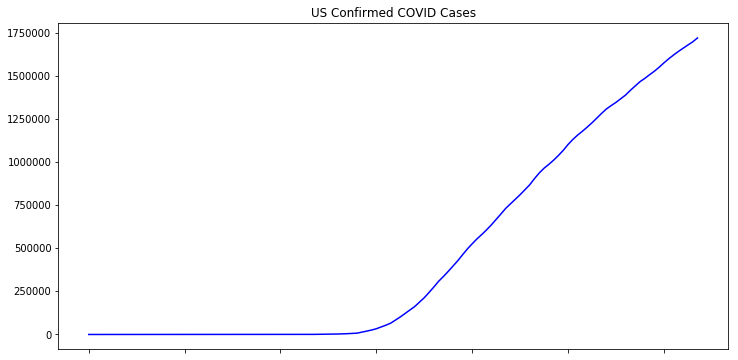

In [21]:
plt.figure(figsize=(12,6))
data.plot(title="US Confirmed COVID Cases", color = 'blue')
plt.show()

In [22]:
data.index = pd.to_datetime(data.index)

In [23]:
weekly = data.resample("W").mean()

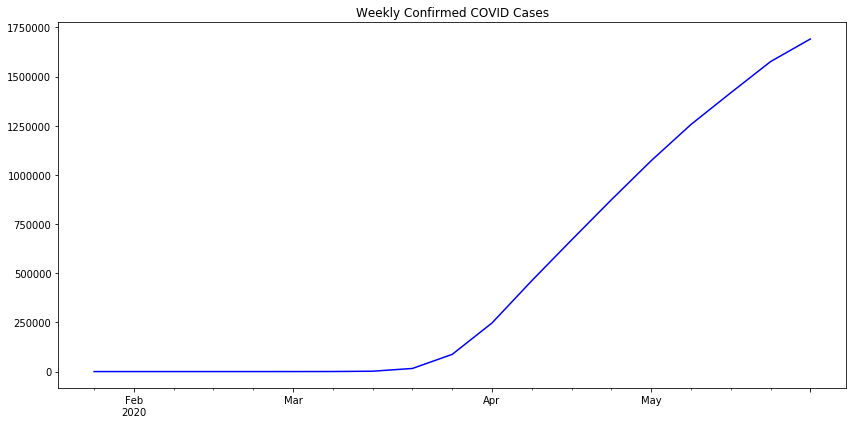

In [24]:
plt.figure(figsize=(12,6))
weekly.plot(title="Weekly Confirmed COVID Cases", color = 'blue')
plt.tight_layout()
plt.show()

In [25]:
weekly
type(weekly)
summary = data.describe()

In [26]:
summary = summary.transpose()
summary.head()

count       128.000000
mean     472810.125000
std      588694.078881
min           1.000000
25%          15.000000
Name: US - , dtype: float64

In [27]:
def create_training_series(complete_time_series, prediction_length):
    time_series_training = []
    observations = complete_time_series.shape[0]
    #complete_time_series = complete_time_series.tolist()
    for ts in range(1,int(observations/prediction_length)):
        time_series_training.append(complete_time_series.iloc[ts:ts-prediction_length])
        
    return time_series_training

In [28]:
prediction_length = 2

time_series_training = create_training_series(plain_df, prediction_length)

In [29]:
ts = time_series_training[0]
type(time_series_training)

list

In [30]:
ts_lists = []
for i in time_series_training:
    print(i.head())
    ts_lists.append(i.values.tolist())

                        1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country - State                                                                
Albania -                     0        0        0        0        0        0   
Algeria -                     0        0        0        0        0        0   
Andorra -                     0        0        0        0        0        0   
Angola -                      0        0        0        0        0        0   
Antigua and Barbuda -         0        0        0        0        0        0   

                        1/28/20  1/29/20  1/30/20  1/31/20   ...     5/19/20  \
Country - State                                              ...               
Albania -                     0        0        0        0   ...         949   
Algeria -                     0        0        0        0   ...        7377   
Andorra -                     0        0        0        0   ...         761   
Angola -                      0        

[0 rows x 128 columns]
Empty DataFrame
Columns: [1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20, 1/28/20, 1/29/20, 1/30/20, 1/31/20, 2/1/20, 2/2/20, 2/3/20, 2/4/20, 2/5/20, 2/6/20, 2/7/20, 2/8/20, 2/9/20, 2/10/20, 2/11/20, 2/12/20, 2/13/20, 2/14/20, 2/15/20, 2/16/20, 2/17/20, 2/18/20, 2/19/20, 2/20/20, 2/21/20, 2/22/20, 2/23/20, 2/24/20, 2/25/20, 2/26/20, 2/27/20, 2/28/20, 2/29/20, 3/1/20, 3/2/20, 3/3/20, 3/4/20, 3/5/20, 3/6/20, 3/7/20, 3/8/20, 3/9/20, 3/10/20, 3/11/20, 3/12/20, 3/13/20, 3/14/20, 3/15/20, 3/16/20, 3/17/20, 3/18/20, 3/19/20, 3/20/20, 3/21/20, 3/22/20, 3/23/20, 3/24/20, 3/25/20, 3/26/20, 3/27/20, 3/28/20, 3/29/20, 3/30/20, 3/31/20, 4/1/20, 4/2/20, 4/3/20, 4/4/20, 4/5/20, 4/6/20, 4/7/20, 4/8/20, 4/9/20, 4/10/20, 4/11/20, 4/12/20, 4/13/20, 4/14/20, 4/15/20, 4/16/20, 4/17/20, 4/18/20, 4/19/20, 4/20/20, 4/21/20, 4/22/20, 4/23/20, 4/24/20, 4/25/20, 4/26/20, 4/27/20, 4/28/20, 4/29/20, 4/30/20, ...]
Index: []

[0 rows x 128 columns]
Empty DataFrame
Columns: [1/22/20, 1/23

In [31]:
data.rolling(2, win_type='triang').sum()

2020-01-22          NaN
2020-01-23          1.0
2020-01-24          1.5
2020-01-25          2.0
2020-01-26          3.5
2020-01-27          5.0
2020-01-28          5.0
2020-01-29          5.0
2020-01-30          5.0
2020-01-31          6.0
2020-02-01          7.5
2020-02-02          8.0
2020-02-03          9.5
2020-02-04         11.0
2020-02-05         11.0
2020-02-06         11.0
2020-02-07         11.0
2020-02-08         11.0
2020-02-09         11.0
2020-02-10         11.0
2020-02-11         11.5
2020-02-12         12.0
2020-02-13         12.5
2020-02-14         13.0
2020-02-15         13.0
2020-02-16         13.0
2020-02-17         13.0
2020-02-18         13.0
2020-02-19         13.0
2020-02-20         13.0
                ...    
2020-04-29    1026245.5
2020-04-30    1054666.5
2020-05-01    1086442.5
2020-05-02    1118000.0
2020-05-03    1145289.5
2020-05-04    1169207.5
2020-05-05    1192363.0
2020-05-06    1216841.0
2020-05-07    1243177.0
2020-05-08    1270476.0
2020-05-09    12

In [32]:
data.head()

2020-01-22    1
2020-01-23    1
2020-01-24    2
2020-01-25    2
2020-01-26    5
Name: US - , dtype: int64

In [33]:
# Create Differential to show new cases instead of accumulating old ones
differential = pd.DataFrame(data.iloc[:-1])

for i in range(1, data.shape[0]):
    differential.iloc[i-1] = data.iloc[i] - data.iloc[i-1]

In [34]:
type(differential)

pandas.core.frame.DataFrame

In [35]:
differential.head()

,US -
2020-01-22,0
2020-01-23,1
2020-01-24,0
2020-01-25,3
2020-01-26,0


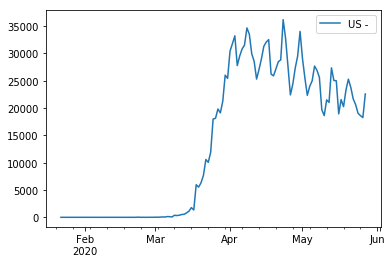

In [36]:
differential.plot()
plt.show()

In [37]:
differential.head()

,US -
2020-01-22,0
2020-01-23,1
2020-01-24,0
2020-01-25,3
2020-01-26,0


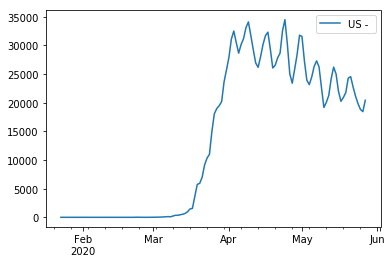

In [38]:
rolling_two_day = differential.rolling(2).mean()
rolling_two_day.plot()
plt.show()

In [39]:
five_day = differential.rolling(5).mean()

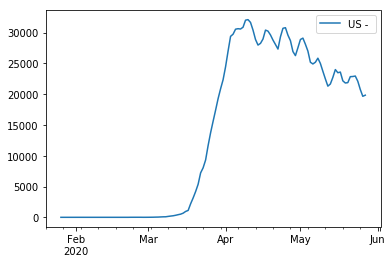

In [40]:
five_day.plot()
plt.show()

In [41]:
differential.head()

,US -
2020-01-22,0
2020-01-23,1
2020-01-24,0
2020-01-25,3
2020-01-26,0


In [42]:
weekly_differenced = pd.DataFrame(differential.iloc[:-7])

for i in range(7, differential.shape[0]):
    weekly_differenced.iloc[i-7] = differential.iloc[i] - differential.iloc[i-7]

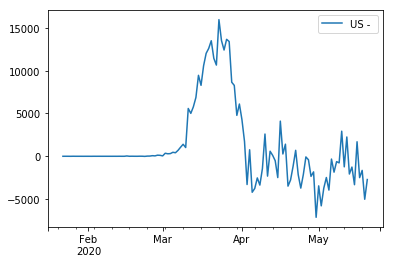

In [43]:
weekly_differenced.plot()
plt.show()

In [44]:
meta_difference = pd.DataFrame(differential.iloc[:-1])

for i in range(1, differential.shape[0]):
    meta_difference.iloc[i-1] = differential.iloc[i] - differential.iloc[i-1]

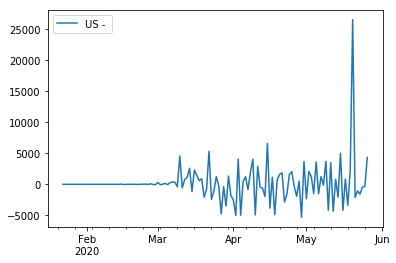

In [45]:
meta_difference.plot()
plt.show()

In [46]:
true_weekly_differenced = pd.DataFrame(data.iloc[:-7])

for i in range(7, data.shape[0]):
    true_weekly_differenced.iloc[i-7] = data.iloc[i] - data.iloc[i-7]

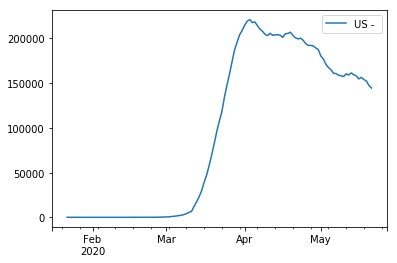

In [47]:
true_weekly_differenced.plot()
plt.show()

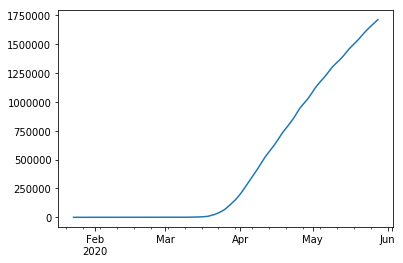

In [48]:
data.rolling(2, win_type='triang').mean().plot()
plt.show()

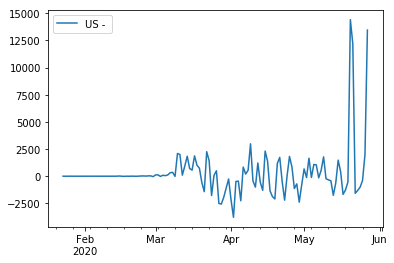

In [49]:
differential.rolling(2, win_type='triang').mean().plot()

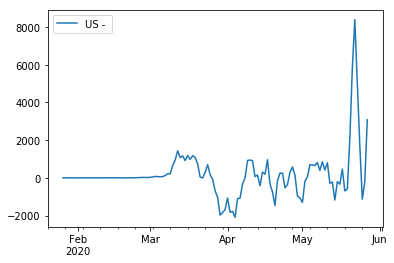

In [50]:
differential.rolling(5, win_type='triang').mean().plot()

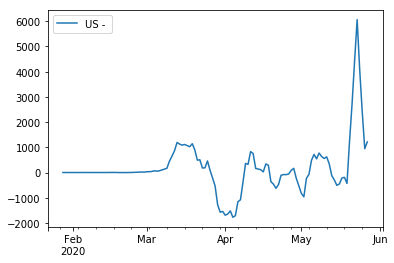

In [51]:
differential.rolling(7, win_type='triang').mean().plot()

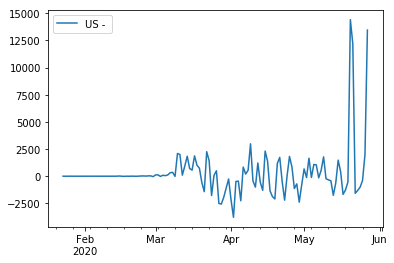

In [52]:
differential.rolling(2, win_type='gaussian').mean(std=100.1).plot()

In [53]:
# Create Differential to show new cases instead of accumulating old ones
differential = pd.DataFrame(data.iloc[:-1])

for i in range(1, data.shape[0]):
    differential.iloc[i-1] = data.iloc[i] - data.iloc[i-1]

In [54]:
summary.transpose()

count    1.280000e+02
mean     4.728101e+05
std      5.886941e+05
min      1.000000e+00
25%      1.500000e+01
50%      7.484000e+04
75%      9.713880e+05
max      1.721753e+06
Name: US - , dtype: float64

In [55]:
summary.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [56]:
summary.std

<bound method Series.std of count    1.280000e+02
mean     4.728101e+05
std      5.886941e+05
min      1.000000e+00
25%      1.500000e+01
50%      7.484000e+04
75%      9.713880e+05
max      1.721753e+06
Name: US - , dtype: float64>

In [57]:
summary['std']

588694.0788811289

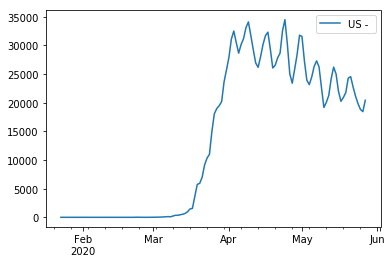

In [58]:
differential.rolling(2, win_type='gaussian').mean(std=summary['std']).plot()

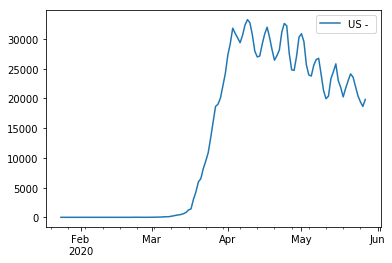

In [59]:
differential.rolling(3, win_type='gaussian').mean(std=summary['std']).plot()

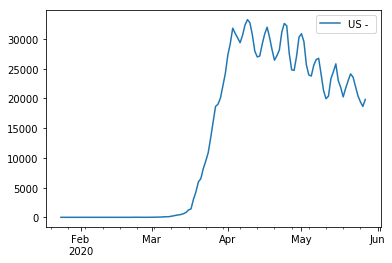

In [60]:
differential.rolling(3, win_type='gaussian').mean(std=summary['std']).plot()

In [61]:
differential.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2020-01-22 to 2020-05-27
Data columns (total 1 columns):
US -     127 non-null int64
dtypes: int64(1)
memory usage: 2.0 KB


In [62]:
diff_summary = differential.describe().transpose()

In [63]:
diff_summary

,count,mean,std,min,25%,50%,75%,max
US -,127.0,13557.102362,13058.207092,0.0,2.0,17992.0,25760.0,36188.0


In [64]:
summary.transpose()

count    1.280000e+02
mean     4.728101e+05
std      5.886941e+05
min      1.000000e+00
25%      1.500000e+01
50%      7.484000e+04
75%      9.713880e+05
max      1.721753e+06
Name: US - , dtype: float64

In [65]:
summary

count    1.280000e+02
mean     4.728101e+05
std      5.886941e+05
min      1.000000e+00
25%      1.500000e+01
50%      7.484000e+04
75%      9.713880e+05
max      1.721753e+06
Name: US - , dtype: float64

In [66]:
data.describe().transpose()

count    1.280000e+02
mean     4.728101e+05
std      5.886941e+05
min      1.000000e+00
25%      1.500000e+01
50%      7.484000e+04
75%      9.713880e+05
max      1.721753e+06
Name: US - , dtype: float64

In [67]:
summary = pd.DataFrame(summary)

In [68]:
summary.transpose()

,count,mean,std,min,25%,50%,75%,max
US -,128.0,472810.125,588694.078881,1.0,15.0,74840.0,971388.0,1721753.0


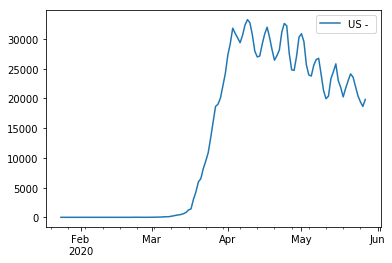

In [69]:
differential.rolling(3, win_type='gaussian').mean(std=diff_summary['std'][0]).plot()

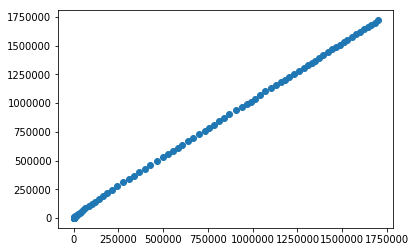

In [70]:
x = data.iloc[:-1]
y = data.iloc[1:]

plt.scatter(x,y)

In [71]:
model = np.polyfit(x,y,1)

In [72]:
predict = np.poly1d(model)
confirmed_test_case = 100
predict(confirmed_test_case)

6429.773445610215

In [73]:
from sklearn.metrics import r2_score
r2_score(y, predict(x))

0.9997456340103636

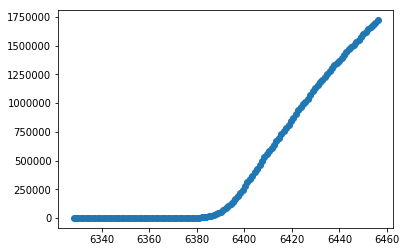

In [74]:
x_lin_reg = range(0,127)
y_lin_reg = predict(x_lin_reg)
plt.scatter(y_lin_reg,y)


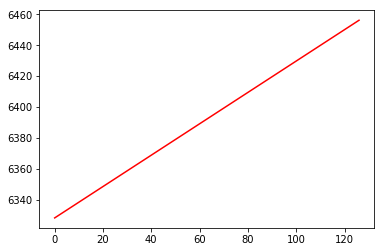

In [75]:
plt.plot(x_lin_reg, y_lin_reg, c = 'r')

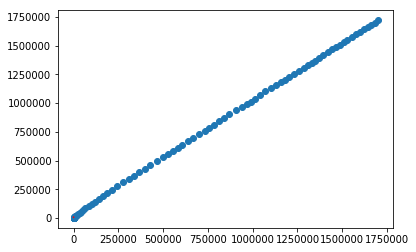

In [76]:
plt.scatter(x,y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')

In [77]:
type(differential["US - "])
diff_series = differential["US - "]

In [78]:
differenced_model = np.polyfit(data[:-1], diff_series, 1)
differenced_model

array([1.56139658e-02, 6.32821205e+03])

In [79]:
model

array([1.01561397e+00, 6.32821205e+03])

In [80]:
diff_predict = np.poly1d(differenced_model)
diff_predict(confirmed_test_case)

6329.77344561013

In [81]:
predict(confirmed_test_case)

6429.773445610215

In [82]:
diff_predict(200)

6331.334842187852

In [83]:
predict(200)

6531.334842187937

In [84]:
y_pred = diff_predict(data[:-1])
r2_score(diff_series, y_pred)

0.4815874136975462

In [85]:
change_model = np.polyfit(diff_series[:-1], diff_series[1:],1)
change_predict = np.poly1d(change_model)
y_pred_change = change_predict(diff_series[:-1])

In [86]:
r2_score(diff_series[1:], y_pred_change)

0.9696316809215968

In [87]:
change_model

array([  0.98232079, 417.59577772])

[]

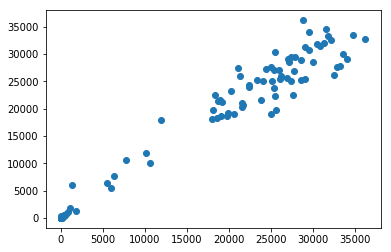

In [88]:
plt.scatter(diff_series[:-1], diff_series[1:])
plt.plot()

[]

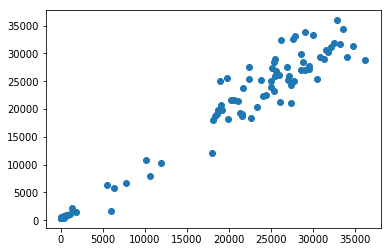

In [89]:
plt.scatter(diff_series[1:], y_pred_change)
plt.plot()

In [90]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_change = sqrt(mean_squared_error(diff_series[1:], y_pred_change))

In [91]:
rmse_change

2265.7577538657247

In [95]:
rmse_persistence = sqrt(mean_squared_error(diff_series[:-1], diff_series[1:]))
rmse_persistence

2284.4817636767048

In [96]:
plain_df.transpose().head()

Country - State,Afghanistan -,Albania -,Algeria -,Andorra -,Angola -,Antigua and Barbuda -,Argentina -,Armenia -,Australia - Australian Capital Territory,Australia - New South Wales,...,Malawi -,United Kingdom - Falkland Islands (Malvinas),France - Saint Pierre and Miquelon,South Sudan -,Western Sahara -,Sao Tome and Principe -,Yemen -,Comoros -,Tajikistan -,Lesotho -
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [97]:
plain_df.index

CategoricalIndex(['Afghanistan - ', 'Albania - ', 'Algeria - ', 'Andorra - ',
                  'Angola - ', 'Antigua and Barbuda - ', 'Argentina - ',
                  'Armenia - ', 'Australia - Australian Capital Territory',
                  'Australia - New South Wales',
                  ...
                  'Malawi - ', 'United Kingdom - Falkland Islands (Malvinas)',
                  'France - Saint Pierre and Miquelon', 'South Sudan - ',
                  'Western Sahara - ', 'Sao Tome and Principe - ', 'Yemen - ',
                  'Comoros - ', 'Tajikistan - ', 'Lesotho - '],
                 categories=['Afghanistan - ', 'Albania - ', 'Algeria - ', 'Andorra - ', 'Angola - ', 'Antigua and Barbuda - ', 'Argentina - ', 'Armenia - ', ...], ordered=False, name='Country - State', dtype='category', length=266)

In [98]:
plain_df.reset_index()

,Country - State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
0,Afghanistan -,0,0,0,0,0,0,0,0,0,...,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036
1,Albania -,0,0,0,0,0,0,0,0,0,...,949,964,969,981,989,998,1004,1029,1050,1076
2,Algeria -,0,0,0,0,0,0,0,0,0,...,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997
3,Andorra -,0,0,0,0,0,0,0,0,0,...,761,762,762,762,762,762,763,763,763,763
4,Angola -,0,0,0,0,0,0,0,0,0,...,52,52,58,60,61,69,70,70,71,74
5,Antigua and Barbuda -,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
6,Argentina -,0,0,0,0,0,0,0,0,0,...,8809,9283,9931,10649,11353,12076,12628,13228,13933,14702
7,Armenia -,0,0,0,0,0,0,0,0,0,...,5041,5271,5606,5928,6302,6661,7113,7402,7774,8216
8,Australia - Australian Capital Territory,0,0,0,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,107
9,Australia - New South Wales,0,0,0,0,3,4,4,4,4,...,3081,3082,3084,3086,3087,3090,3092,3089,3090,3092


In [99]:
test_df = plain_df.transpose()

In [100]:
for i in test_df.columns:
    print(test_df[i].head())

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Afghanistan - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Albania - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Algeria - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Andorra - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Angola - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Antigua and Barbuda - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Argentina - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Armenia - , dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Australia - Australian Capital Territory, dtype: int64
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    3
Name: Australia - New So

In [104]:
test_df.index = pd.to_datetime(test_df.index)
index = test_df.index

In [105]:
stacked_df = pd.DataFrame()

for i in test_df.columns:
    temp_df = pd.DataFrame(test_df[i].values, columns = ["Confirmed_Cases"])
    temp_df['Country'] = i
    temp_df.index = index
    stacked_df = stacked_df.append(temp_df, ignore_index=False)

In [106]:
stacked_df.iloc[0:5]

,Confirmed_Cases,Country
2020-01-22,0,Afghanistan -
2020-01-23,0,Afghanistan -
2020-01-24,0,Afghanistan -
2020-01-25,0,Afghanistan -
2020-01-26,0,Afghanistan -


In [107]:
stacked_df.iloc[128:133]

,Confirmed_Cases,Country
2020-01-22,0,Albania -
2020-01-23,0,Albania -
2020-01-24,0,Albania -
2020-01-25,0,Albania -
2020-01-26,0,Albania -


In [108]:
stacked_df[stacked_df['Country'] == 'Albania - ']

,Confirmed_Cases,Country
2020-01-22,0,Albania -
2020-01-23,0,Albania -
2020-01-24,0,Albania -
2020-01-25,0,Albania -
2020-01-26,0,Albania -
2020-01-27,0,Albania -
2020-01-28,0,Albania -
2020-01-29,0,Albania -
2020-01-30,0,Albania -
2020-01-31,0,Albania -


In [109]:
alb = stacked_df[stacked_df['Country'] == 'Albania - ']
alb['Confirmed_Cases'].diff()

2020-01-22     NaN
2020-01-23     0.0
2020-01-24     0.0
2020-01-25     0.0
2020-01-26     0.0
2020-01-27     0.0
2020-01-28     0.0
2020-01-29     0.0
2020-01-30     0.0
2020-01-31     0.0
2020-02-01     0.0
2020-02-02     0.0
2020-02-03     0.0
2020-02-04     0.0
2020-02-05     0.0
2020-02-06     0.0
2020-02-07     0.0
2020-02-08     0.0
2020-02-09     0.0
2020-02-10     0.0
2020-02-11     0.0
2020-02-12     0.0
2020-02-13     0.0
2020-02-14     0.0
2020-02-15     0.0
2020-02-16     0.0
2020-02-17     0.0
2020-02-18     0.0
2020-02-19     0.0
2020-02-20     0.0
              ... 
2020-04-29    16.0
2020-04-30     7.0
2020-05-01     9.0
2020-05-02     7.0
2020-05-03     6.0
2020-05-04     8.0
2020-05-05    17.0
2020-05-06    12.0
2020-05-07    10.0
2020-05-08     8.0
2020-05-09     6.0
2020-05-10    12.0
2020-05-11     4.0
2020-05-12     4.0
2020-05-13     4.0
2020-05-14    18.0
2020-05-15    18.0
2020-05-16    17.0
2020-05-17    13.0
2020-05-18     2.0
2020-05-19     1.0
2020-05-20  

In [110]:
new_df = test_df
for i in test_df.columns:
    new_df[i] = new_df[i].diff()

new_df.dropna(inplace=True)
index = new_df.index

In [111]:
final_clean_df = pd.DataFrame()

for i in test_df.columns:
    temp_df = pd.DataFrame(new_df[i].values, columns = ['Confirmed_Cases'])
    temp_df['Country'] = i
    temp_df.index = index
    final_clean_df = final_clean_df.append(temp_df, ignore_index=False)

In [112]:
final_clean_df.describe()

,Confirmed_Cases
count,33782.000000
mean,171.937452
std,1353.983287
min,-10034.000000
25%,0.000000
50%,0.000000
75%,10.000000
max,36188.000000


In [113]:
final_clean_df.loc[final_clean_df['Confirmed_Cases'] == -10034]

,Confirmed_Cases,Country
2020-04-24,-10034.0,Spain -


In [114]:
test_df['Spain - ']

2020-01-23       0.0
2020-01-24       0.0
2020-01-25       0.0
2020-01-26       0.0
2020-01-27       0.0
2020-01-28       0.0
2020-01-29       0.0
2020-01-30       0.0
2020-01-31       0.0
2020-02-01       1.0
2020-02-02       0.0
2020-02-03       0.0
2020-02-04       0.0
2020-02-05       0.0
2020-02-06       0.0
2020-02-07       0.0
2020-02-08       0.0
2020-02-09       1.0
2020-02-10       0.0
2020-02-11       0.0
2020-02-12       0.0
2020-02-13       0.0
2020-02-14       0.0
2020-02-15       0.0
2020-02-16       0.0
2020-02-17       0.0
2020-02-18       0.0
2020-02-19       0.0
2020-02-20       0.0
2020-02-21       0.0
               ...  
2020-04-29    2144.0
2020-04-30     518.0
2020-05-01    1781.0
2020-05-02    1366.0
2020-05-03     884.0
2020-05-04     545.0
2020-05-05    1318.0
2020-05-06     996.0
2020-05-07    1122.0
2020-05-08    1410.0
2020-05-09     721.0
2020-05-10     772.0
2020-05-11    3086.0
2020-05-12     594.0
2020-05-13     661.0
2020-05-14     849.0
2020-05-15   

In [115]:
confirmed_data.loc['Spain - '].iloc[:-1].diff()

Lat         NaN
Long        -44
1/22/20       4
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
1/27/20       0
1/28/20       0
1/29/20       0
1/30/20       0
1/31/20       0
2/1/20        1
2/2/20        0
2/3/20        0
2/4/20        0
2/5/20        0
2/6/20        0
2/7/20        0
2/8/20        0
2/9/20        1
2/10/20       0
2/11/20       0
2/12/20       0
2/13/20       0
2/14/20       0
2/15/20       0
2/16/20       0
2/17/20       0
2/18/20       0
           ... 
4/29/20    2144
4/30/20     518
5/1/20     1781
5/2/20     1366
5/3/20      884
5/4/20      545
5/5/20     1318
5/6/20      996
5/7/20     1122
5/8/20     1410
5/9/20      721
5/10/20     772
5/11/20    3086
5/12/20     594
5/13/20     661
5/14/20     849
5/15/20     643
5/16/20     515
5/17/20       0
5/18/20     908
5/19/20     431
5/20/20     518
5/21/20     482
5/22/20    1787
5/23/20     466
5/24/20     482
5/25/20    -372
5/26/20     859
5/27/20       0
5/28/20    1647
Name: Spain - , Length: 

In [116]:
confirmed_data.loc['Spain - '].iloc[:-1].diff().describe()

count     129.0
unique     91.0
top         0.0
freq       34.0
Name: Spain - , dtype: float64

In [117]:
#It appears I have bad data from Spain, either that or I am misunderstanding the data.  After using pandas.diff() function,
# I am actually getting a negative number from 5/24 to 5/25 as the total goes from 235,772 confirmed cases on 5/24,
# TO 235,400 cases on 5/25.  I might want to consider discarding Spain from the dataset.
# There is also a negative number from 4/24 to 4/25
# To be sure, I compared it to the original dataset I imported to ensure I didn't alter the data during my investigation.


In [125]:
final_clean_df.loc[final_clean_df['Confirmed_Cases'] < 0]

,Confirmed_Cases,Country
2020-04-13,-1.0,Australia - Australian Capital Territory
2020-05-03,-2.0,Australia - New South Wales
2020-05-26,-3.0,Australia - New South Wales
2020-03-06,-1.0,Australia - Northern Territory
2020-05-01,-1.0,Australia - Northern Territory
2020-01-31,-1.0,Australia - Queensland
2020-02-02,-1.0,Australia - Queensland
2020-04-29,-1.0,Australia - Queensland
2020-05-13,-1.0,Australia - Queensland
2020-05-24,-5.0,Australia - Queensland


In [126]:
negative_differences = final_clean_df.loc[final_clean_df['Confirmed_Cases'] < 0]
negative_differences.shape

(54, 2)

In [127]:
trivial_diffs = negative_differences[negative_differences.loc[:, 'Confirmed_Cases']==-1]
trivial_diffs.shape

(22, 2)

In [128]:
len(trivial_diffs.Country.unique())

15

In [129]:
nontrivial_diffs = negative_differences[negative_differences.loc[:, 'Confirmed_Cases']<-1]
len(nontrivial_diffs.Country.unique())

21

In [130]:
negative_differences.Country.unique()

array(['Australia - Australian Capital Territory',
       'Australia - New South Wales', 'Australia - Northern Territory',
       'Australia - Queensland', 'Australia - Western Australia',
       'Benin - ', 'Canada - Alberta', 'Canada - Manitoba',
       'Canada - Newfoundland and Labrador', 'Canada - Ontario',
       'China - Guizhou', 'Ecuador - ', 'France - New Caledonia',
       'France - Reunion', 'France - Saint Barthelemy', 'France - ',
       'Guyana - ', 'Honduras - ', 'Japan - ', 'Lithuania - ',
       'Madagascar - ', 'Mauritius - ', 'Nepal - ', 'New Zealand - ',
       'Portugal - ', 'San Marino - ', 'Spain - ', 'Uganda - ',
       'United Kingdom - Gibraltar', 'United Kingdom - ', 'Uruguay - ',
       'Zimbabwe - ', 'United Kingdom - Turks and Caicos Islands'],
      dtype=object)

In [131]:
len(negative_differences.Country.unique())

33

In [132]:
# So I have 33 countries that actually show bad values if we think the dataset shows the number of total confirmed cases,
# It may be the case that it actually represents the number of ACTIVE cases.

In [133]:
df = final_clean_df

In [134]:
df[df['Country'] == 'US - ']

,Confirmed_Cases,Country
2020-01-23,0.0,US -
2020-01-24,1.0,US -
2020-01-25,0.0,US -
2020-01-26,3.0,US -
2020-01-27,0.0,US -
2020-01-28,0.0,US -
2020-01-29,0.0,US -
2020-01-30,0.0,US -
2020-01-31,2.0,US -
2020-02-01,1.0,US -


In [135]:
us = df[df['Country'] == 'US - ']

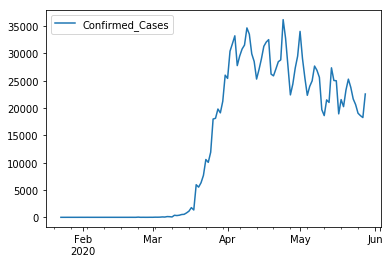

In [136]:
us.plot()

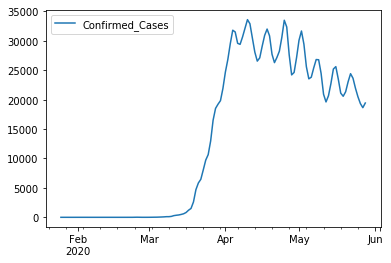

In [137]:
us.rolling(window=3, win_type='triang').mean().plot()

In [ ]:
us.index

In [139]:
us_without_last_day = us.drop(us.index[-1])

In [140]:
us_without_last_day.tail()

,Confirmed_Cases,Country
2020-05-23,21675.0,US -
2020-05-24,20634.0,US -
2020-05-25,19056.0,US -
2020-05-26,18611.0,US -
2020-05-27,18263.0,US -


In [141]:
us_without_first_day = us.drop(us.index[0])
us_without_first_day.head()

,Confirmed_Cases,Country
2020-01-24,1.0,US -
2020-01-25,0.0,US -
2020-01-26,3.0,US -
2020-01-27,0.0,US -
2020-01-28,0.0,US -


In [142]:
us_x = us_without_last_day
us_y = us_without_first_day

In [143]:
experimental_df = final_clean_df

In [144]:
edf = experimental_df

In [145]:
edf.head()

,Confirmed_Cases,Country
2020-01-23,0.0,Afghanistan -
2020-01-24,0.0,Afghanistan -
2020-01-25,0.0,Afghanistan -
2020-01-26,0.0,Afghanistan -
2020-01-27,0.0,Afghanistan -


In [146]:
temp_x = edf.drop(edf.index[-1])

In [147]:
temp_x.head()

,Confirmed_Cases,Country
2020-01-23,0.0,Afghanistan -
2020-01-24,0.0,Afghanistan -
2020-01-25,0.0,Afghanistan -
2020-01-26,0.0,Afghanistan -
2020-01-27,0.0,Afghanistan -


In [148]:
temp_x.iloc[125:133]

,Confirmed_Cases,Country
2020-05-27,625.0,Afghanistan -
2020-01-23,0.0,Albania -
2020-01-24,0.0,Albania -
2020-01-25,0.0,Albania -
2020-01-26,0.0,Albania -
2020-01-27,0.0,Albania -
2020-01-28,0.0,Albania -
2020-01-29,0.0,Albania -


In [149]:
temp_y = edf.drop(edf.index[0])

In [150]:
temp_y.shape

(33516, 2)

In [151]:
edf.shape

(33782, 2)

In [153]:
newdf = pd.DataFrame(temp_x)
newdf['Target'] = temp_y['Confirmed_Cases'].values
newdf.head()

,Confirmed_Cases,Country,Target
2020-01-23,0.0,Afghanistan -,0.0
2020-01-24,0.0,Afghanistan -,0.0
2020-01-25,0.0,Afghanistan -,0.0
2020-01-26,0.0,Afghanistan -,0.0
2020-01-27,0.0,Afghanistan -,0.0


In [154]:
temp_y.reset_index()
newdf.reindex(columns=['Country', 'Confirmed_Cases', 'Target'])
newdf.tail()

,Confirmed_Cases,Country,Target
2020-05-23,0.0,Lesotho -,0.0
2020-05-24,0.0,Lesotho -,0.0
2020-05-25,0.0,Lesotho -,0.0
2020-05-26,0.0,Lesotho -,0.0
2020-05-27,0.0,Lesotho -,0.0


In [155]:
newdf = newdf.reindex(columns=['Country', 'Confirmed_Cases', 'Target'])

In [156]:
newdf['Country'] = newdf['Country'].astype('category')

In [157]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33516 entries, 2020-01-23 to 2020-05-27
Data columns (total 3 columns):
Country            33516 non-null category
Confirmed_Cases    33516 non-null float64
Target             33516 non-null float64
dtypes: category(1), float64(2)
memory usage: 863.1 KB


In [159]:
predictors = newdf.loc[:, 'Country':'Confirmed_Cases']
targets = newdf.loc[:, 'Target']

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [162]:
binarydf = pd.get_dummies(newdf, columns=['Country'])

In [163]:
predictors = binarydf.loc[:, binarydf.columns!='Target']
targets = binarydf.loc[:, 'Target']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(predictors, targets, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [165]:
print(regressor.intercept_)

10.841353570397558


In [166]:
regressor.coef_

array([ 9.59948650e-01,  4.79028660e-01, -1.03188730e+01, -8.05534811e+00,
       -1.06049464e+01, -1.07345330e+01, -1.08268710e+01,  1.77251812e+00,
       -5.93062248e+00, -1.08587545e+01, -1.11005723e+01, -1.08521119e+01,
       -1.05617438e+01, -1.14451233e+01, -1.07027640e+01, -1.18870261e+01,
       -1.03892355e+01, -6.36332458e+00, -8.59426428e+00, -1.09401403e+01,
       -1.97344826e+00,  1.34400495e+01, -1.08005516e+01,  8.70219119e+00,
       -2.03417173e+01, -1.08164498e+01, -1.09430630e+01, -1.07946773e+01,
       -6.70987233e+00, -9.72731887e+00, -1.07915361e+01,  3.13699227e+02,
       -1.08713896e+01, -8.97728446e+00, -1.09610215e+01, -1.04987294e+01,
       -1.07781982e+01, -1.08020978e+01, -1.07678987e+01, -1.69555491e+01,
       -1.03224364e+01, -9.65501048e+00, -1.08409647e+01, -1.08178191e+01,
       -1.04739854e+01, -1.06454590e+01, -1.11036411e+01, -1.08301520e+01,
       -1.05640433e+01,  2.19917445e+00, -1.08049093e+01,  1.74129953e+00,
       -1.07493924e+01, -

In [167]:
y_pred = regressor.predict(X_test)

In [168]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
2020-03-27,16.0,14.536575
2020-01-24,0.0,4.478029
2020-03-30,6.0,8.929959
2020-04-25,2.0,5.829522
2020-04-06,104.0,407.364229


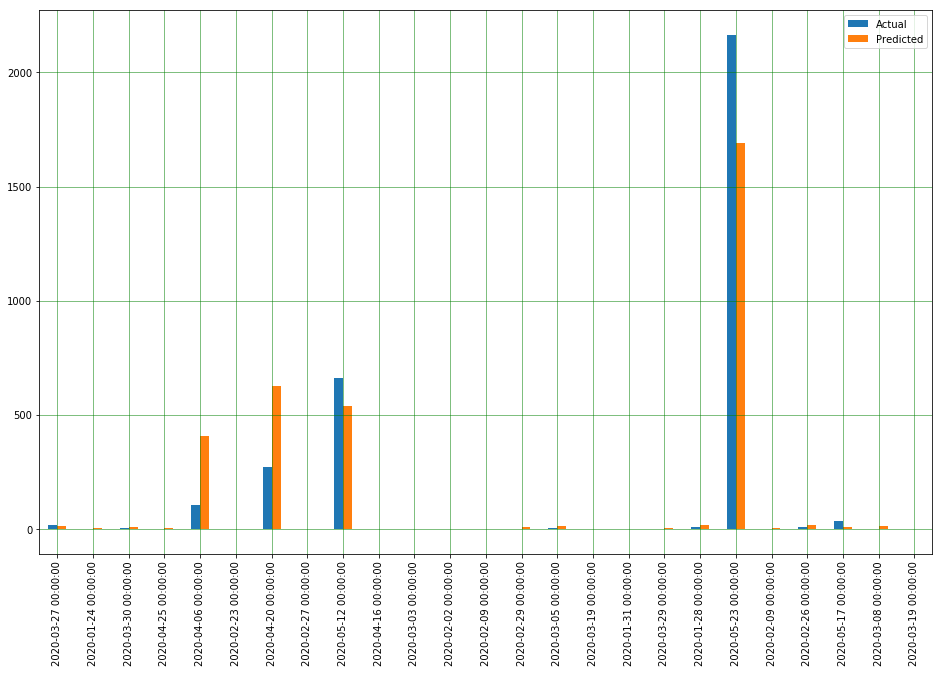

In [169]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

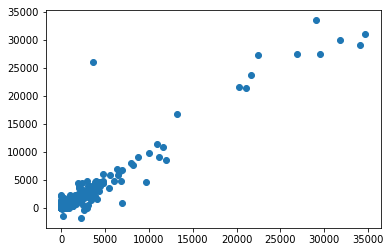

In [170]:
plt.scatter(y_test, y_pred)

In [171]:
binarydf.describe()

,Confirmed_Cases,Target,Country_Afghanistan -,Country_Albania -,Country_Algeria -,Country_Andorra -,Country_Angola -,Country_Antigua and Barbuda -,Country_Argentina -,Country_Armenia -,...,Country_United Kingdom - Turks and Caicos Islands,Country_Uruguay -,Country_Uzbekistan -,Country_Venezuela -,Country_Vietnam -,Country_West Bank and Gaza -,Country_Western Sahara -,Country_Yemen -,Country_Zambia -,Country_Zimbabwe -
count,33516.000000,33516.000000,33516.000000,33516.000000,33516.000000,33516.000000,33516.000000,33516.000000,33516.000000,33516.000000,...,33516.000000,33516.000000,33516.000000,33516.000000,33516.000000,33516.000000,33516.000000,33516.000000,33516.000000,33516.000000
mean,169.806510,173.299081,0.003759,0.003759,0.003759,0.003759,0.003759,0.003759,0.003759,0.003759,...,0.003759,0.003759,0.003759,0.003759,0.003759,0.003759,0.003759,0.003759,0.003759,0.003759
std,1343.712749,1359.259156,0.061199,0.061199,0.061199,0.061199,0.061199,0.061199,0.061199,0.061199,...,0.061199,0.061199,0.061199,0.061199,0.061199,0.061199,0.061199,0.061199,0.061199,0.061199
min,-10034.000000,-10034.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,36188.000000,36188.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [172]:
sqrt(mean_squared_error(y_test, y_pred))

356.27200574268016

In [173]:
r2_score(y_test, y_pred)

0.9147849396586832

In [174]:
regressor.coef_.shape

(267,)

In [175]:
final_clean_df.head()

,Confirmed_Cases,Country
2020-01-23,0.0,Afghanistan -
2020-01-24,0.0,Afghanistan -
2020-01-25,0.0,Afghanistan -
2020-01-26,0.0,Afghanistan -
2020-01-27,0.0,Afghanistan -


In [176]:
final_clean_df.Country = final_clean_df.Country.astype('category')

In [177]:
final_clean_df.Country.dtypes

CategoricalDtype(categories=['Afghanistan - ', 'Albania - ', 'Algeria - ', 'Andorra - ',
                  'Angola - ', 'Antigua and Barbuda - ', 'Argentina - ',
                  'Armenia - ', 'Australia - Australian Capital Territory',
                  'Australia - New South Wales',
                  ...
                  'United Kingdom - Turks and Caicos Islands', 'Uruguay - ',
                  'Uzbekistan - ', 'Venezuela - ', 'Vietnam - ',
                  'West Bank and Gaza - ', 'Western Sahara - ', 'Yemen - ',
                  'Zambia - ', 'Zimbabwe - '],
                 ordered=False)

In [178]:
final_clean_df.Country.cat.codes

2020-01-23      0
2020-01-24      0
2020-01-25      0
2020-01-26      0
2020-01-27      0
2020-01-28      0
2020-01-29      0
2020-01-30      0
2020-01-31      0
2020-02-01      0
2020-02-02      0
2020-02-03      0
2020-02-04      0
2020-02-05      0
2020-02-06      0
2020-02-07      0
2020-02-08      0
2020-02-09      0
2020-02-10      0
2020-02-11      0
2020-02-12      0
2020-02-13      0
2020-02-14      0
2020-02-15      0
2020-02-16      0
2020-02-17      0
2020-02-18      0
2020-02-19      0
2020-02-20      0
2020-02-21      0
             ... 
2020-04-29    162
2020-04-30    162
2020-05-01    162
2020-05-02    162
2020-05-03    162
2020-05-04    162
2020-05-05    162
2020-05-06    162
2020-05-07    162
2020-05-08    162
2020-05-09    162
2020-05-10    162
2020-05-11    162
2020-05-12    162
2020-05-13    162
2020-05-14    162
2020-05-15    162
2020-05-16    162
2020-05-17    162
2020-05-18    162
2020-05-19    162
2020-05-20    162
2020-05-21    162
2020-05-22    162
2020-05-23

In [179]:
final_clean_df.head()

,Confirmed_Cases,Country
2020-01-23,0.0,Afghanistan -
2020-01-24,0.0,Afghanistan -
2020-01-25,0.0,Afghanistan -
2020-01-26,0.0,Afghanistan -
2020-01-27,0.0,Afghanistan -


In [180]:
final_clean_df.Country = final_clean_df.Country.cat.codes

In [181]:
final_clean_df.head()

,Confirmed_Cases,Country
2020-01-23,0.0,0
2020-01-24,0.0,0
2020-01-25,0.0,0
2020-01-26,0.0,0
2020-01-27,0.0,0


In [182]:
final_clean_df[final_clean_df['Country']==150]

,Confirmed_Cases,Country
2020-01-23,0.0,150
2020-01-24,0.0,150
2020-01-25,0.0,150
2020-01-26,0.0,150
2020-01-27,0.0,150
2020-01-28,0.0,150
2020-01-29,0.0,150
2020-01-30,0.0,150
2020-01-31,0.0,150
2020-02-01,0.0,150


In [183]:
stacked_df.head()

,Confirmed_Cases,Country
2020-01-22,0,Afghanistan -
2020-01-23,0,Afghanistan -
2020-01-24,0,Afghanistan -
2020-01-25,0,Afghanistan -
2020-01-26,0,Afghanistan -


In [184]:
countries = stacked_df.loc[:,'Country'].unique()
ts_list = []
for i in countries:
    temp_list = stacked_df[stacked_df.loc[:, 'Country'] == i].values.tolist()
    ts_list.append(temp_list)